In [1]:
# !pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

import os
import json
from PIL import Image

# Define the input and output folders
input_folder = "data/val/images/"
output_folder = "data/val/new_images/"
json_folder = "data/val/labels/"

new_width = 650
new_height = 450

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Loop through all image files in the input folder
for image_filename in os.listdir(input_folder):
    if image_filename.endswith(".jpg"):  # Adjust the file extension if needed
        # Build the full path for the image and corresponding JSON file
        image_path = os.path.join(input_folder, image_filename)
        json_filename = os.path.splitext(image_filename)[0]
        # json_path = os.path.join(input_folder, json_filename)
        json_path = os.path.join(json_folder, json_filename + ".json")
        print(json_path)

        # Open and resize the image
        image = Image.open(image_path)
        resized_image = image.resize((new_width, new_height), Image.LANCZOS)

        # Save the resized image to the output folder
        output_path = os.path.join(output_folder, image_filename)
        resized_image.save(output_path)

        # # Load and update the corresponding JSON file
        # with open(json_path, "r") as json_file:
        #     json_data = json.load(json_file)
            

        # # Update the JSON data with the new dimensions
        # json_data["imageWidth"] = new_width
        # json_data["imageHeight"] = new_height

        # # Save the updated JSON data back to the same file
        # with open(json_path, "w") as json_file:
        #     json.dump(json_data, json_file, indent=4)

In [1]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')

In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

In [5]:
images = tf.data.Dataset.list_files('data\\train\\images\\*.jpg')

In [6]:
images

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [7]:
images.as_numpy_iterator().next()

b'data\\train\\images\\f106.jpg'

In [8]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [9]:
images = images.map(load_image)

In [10]:
images

<_MapDataset element_spec=TensorSpec(shape=(None, None, None), dtype=tf.uint8, name=None)>

In [11]:
images.as_numpy_iterator().next()

array([[[254, 254, 254],
        [252, 252, 252],
        [250, 250, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [253, 253, 253],
        [252, 252, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[252, 252, 252],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 39,  48,  55],
        [ 39,  48,  55],
        [ 39,  48,  55],
        ...,
        [ 39,  48,  55],
        [ 39,  48,  55],
        [ 39,  48,  55]],

       [[ 39,  48,  55],
        [ 39,  48,  55],
        [ 39,  48,  55],
        ...,
        [ 39,  48,  55],
        [ 39,  48,  55],
        [ 39,  48,  55]],

       [[ 39,  48,  55],
        [ 39,  48,  55],
        [ 39,  48,  55],
        ...,
        [ 39,  48,  55],
        [ 39,  48,  55],
        [ 39,  48,  55]]

In [12]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [13]:
image_generator = images.batch(4).as_numpy_iterator()

In [14]:
plot_images = image_generator.next()

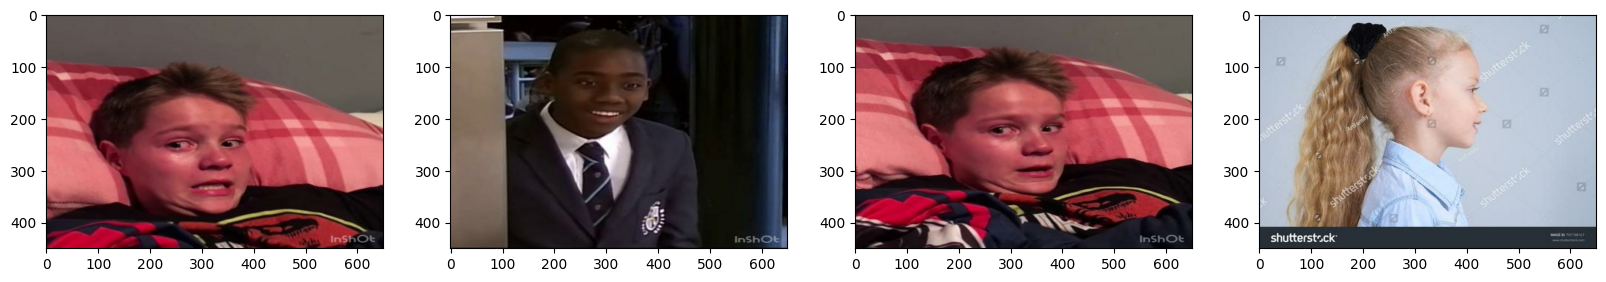

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

## MOVING MATCHING LABELS

In [16]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [17]:
# !pip install albumentations

In [18]:
import albumentations as alb

In [19]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [20]:
img = cv2.imread(os.path.join('data','train', 'images','11.jpg'))

In [21]:
img

array([[[254, 254, 254],
        [252, 252, 252],
        [250, 250, 250],
        ...,
        [252, 252, 252],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 232, 232],
        [232, 232, 232],
        [232, 232, 232]],

       [[253, 253, 253],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [216, 216, 216],
        [217, 217, 217],
        [217, 217, 217]],

       ...,

       [[ 57,  47,  40],
        [ 57,  47,  40],
        [ 57,  47,  40],
        ...,
        [ 57,  47,  40],
        [ 57,  47,  40],
        [ 57,  47,  40]],

       [[ 57,  47,  40],
        [ 57,  47,  40],
        [ 57,  47,  40],
        ...,
        [ 57,  47,  40],
        [ 57,  47,  40],
        [ 57,  47,  40]],

       [[ 57,  47,  40],
        [ 57,  47,  40],
        [ 57,  47,  40],
        ...,
        [ 57,  47,  40],
        [ 57,  47,  40],
        [ 57,  47,  40]]

In [22]:
with open(os.path.join('data', 'train', 'labels', '11.json'), 'r') as f:
    label = json.load(f)

In [23]:
label['shapes'][0]['points']

[[100.65445026178008, 22.38219895287961],
 [555.6282722513088, 273.1675392670157]]

In [24]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [25]:
coords

[100.65445026178008, 22.38219895287961, 555.6282722513088, 273.1675392670157]

In [26]:
coords = list(np.divide(coords, [640,480,640,480]))

In [27]:
coords

[0.15727257853403137,
 0.046629581151832515,
 0.8681691753926699,
 0.569099040139616]

# AUGMENTING

In [28]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [29]:
augmented['bboxes'][0][2:]

(0.9229110311227454, 0.569099040139616)

In [30]:
augmented['bboxes']

[(0.0, 0.04662958115183252, 0.9229110311227454, 0.569099040139616)]

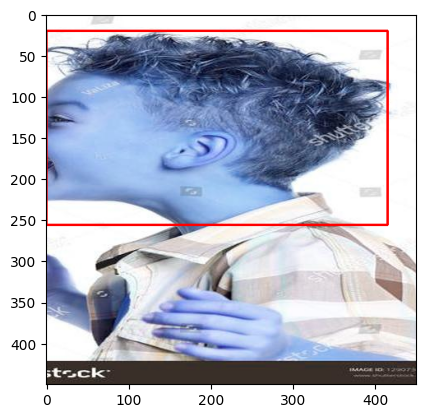

In [31]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# RUN AUGMENTATION

In [32]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(80):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

image must be numpy array type
Expected x_max for bbox [0.2938890706806282, 0.09135034904013967, 1.0137843586387434, 0.8668739092495638, 'face'] to be in the range [0.0, 1.0], got 1.0137843586387434.
image must be numpy array type
Expected x_max for bbox [0.3781495418848167, 0.11098385689354281, 1.0015134162303663, 0.7032613438045375, 'face'] to be in the range [0.0, 1.0], got 1.0015134162303663.


## Load Augmented Images to Tensorflow Dataset

In [33]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [34]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [35]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [36]:
train_images

<_MapDataset element_spec=TensorSpec(shape=(120, 120, None), dtype=tf.float32, name=None)>

In [37]:
train_images.as_numpy_iterator().next()

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.871875  , 0.89117646, 0.9022059 ],
        [0.89191175, 0.9115196 , 0.91433823],
        [0.10741422, 0

## Prepare Labels

In [38]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [39]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [40]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [41]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [42]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.0516 , 0.04663, 1.     , 0.5693 ], dtype=float16))

# Combine Label and Image Samples

In [43]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(5520, 5520, 1200, 1200, 1280, 1280)

In [44]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [45]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [46]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [47]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.      , 0.4385  , 0.506   , 0.9893  ],
        [0.28    , 0.311   , 0.8     , 0.982   ],
        [0.353   , 0.3806  , 0.854   , 0.9917  ],
        [0.04916 , 0.4702  , 0.4143  , 0.9307  ],
        [0.004017, 0.3806  , 0.505   , 0.9917  ],
        [0.5264  , 0.01391 , 0.8184  , 0.2201  ],
        [0.3198  , 0.767   , 0.6436  , 0.9316  ],
        [0.      , 0.00845 , 0.809   , 0.592   ]], dtype=float16))

In [48]:
data_samples = train.as_numpy_iterator()

In [49]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


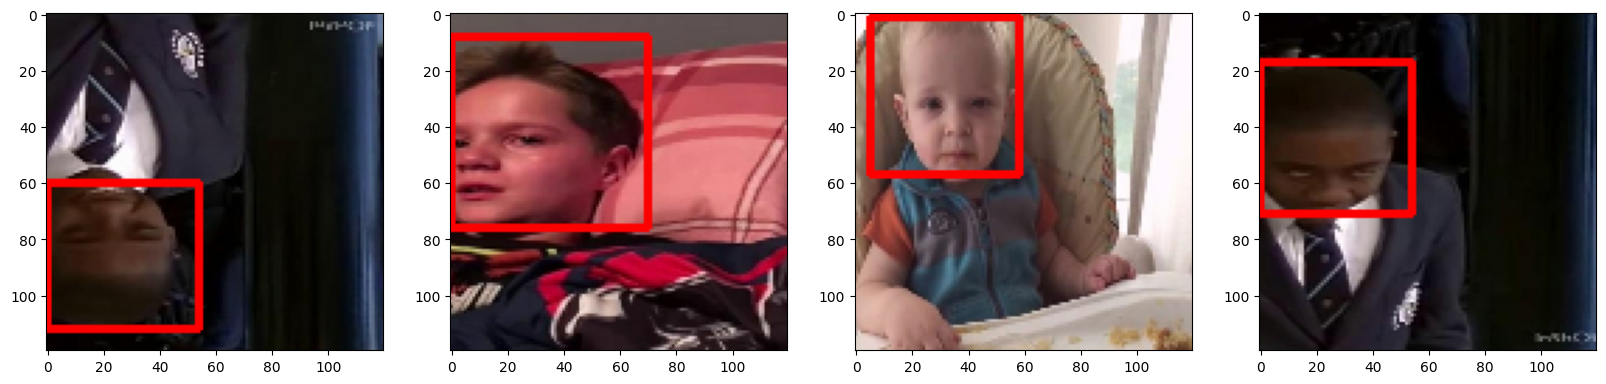

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# Build Deep Learning using the Functional API

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [52]:
vgg = VGG16(include_top=False)

In [53]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## INSTANCE of THE NETWORK

In [54]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [55]:
facetracker = build_model()

In [56]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [57]:
X, y = train.as_numpy_iterator().next()

In [58]:
X.shape


(8, 120, 120, 3)

In [59]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 1s/step


In [60]:
classes, coords

(array([[0.5784336 ],
        [0.59552455],
        [0.5749875 ],
        [0.4981169 ],
        [0.71354795],
        [0.52576125],
        [0.5260984 ],
        [0.6173491 ]], dtype=float32),
 array([[0.42070246, 0.47347257, 0.21202862, 0.61612755],
        [0.4476344 , 0.6119664 , 0.19702879, 0.58937216],
        [0.48737115, 0.5669804 , 0.22904353, 0.59110636],
        [0.36124313, 0.5819888 , 0.10649177, 0.6308514 ],
        [0.4380318 , 0.5270279 , 0.21941604, 0.6343717 ],
        [0.4490354 , 0.4384577 , 0.12676139, 0.6332124 ],
        [0.41425   , 0.40922442, 0.13983834, 0.59293085],
        [0.4978484 , 0.4816466 , 0.07187994, 0.5529496 ]], dtype=float32))

In [61]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [62]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [63]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [64]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [65]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.247168>

In [66]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.55263394>

In [67]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.247168>

#  Train Neural Network

In [69]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [70]:
model = FaceTracker(facetracker)


In [71]:
model.compile(opt, classloss, regressloss)

In [72]:
logdir='logs'

In [73]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [75]:
hist = model.fit(train, epochs=2, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/2
690/690 [==============================] - 7115s 10s/step - total_loss: 0.1491 - class_loss: 1.0749e-04 - regress_loss: 0.1491 - val_total_loss: 0.1503 - val_class_loss: 1.0878e-06 - val_regress_loss: 0.1503
Epoch 2/2
690/690 [==============================] - 4391s 6s/step - total_loss: 0.0175 - class_loss: 1.1380e-06 - regress_loss: 0.0175 - val_total_loss: 0.1385 - val_class_loss: 2.6822e-07 - val_regress_loss: 0.1385


# PERFORMANCE

In [76]:
hist.history

{'total_loss': [0.03454636409878731, 0.020875651389360428],
 'class_loss': [6.109484615990368e-07, 7.525093792537518e-07],
 'regress_loss': [0.034546058624982834, 0.020875275135040283],
 'val_total_loss': [0.1502545177936554, 0.13845296204090118],
 'val_class_loss': [1.0877861313929316e-06, 2.682211004412238e-07],
 'val_regress_loss': [0.15025396645069122, 0.13845282793045044]}

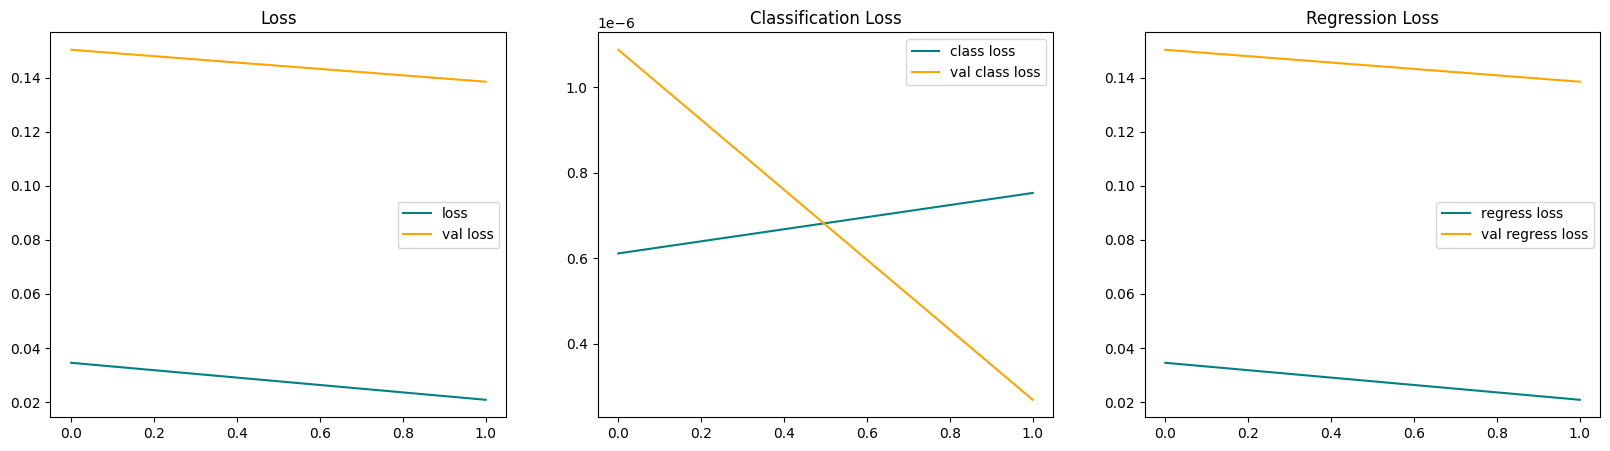

In [77]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# TEST DATA PREDICTIONS

In [78]:
test_data = test.as_numpy_iterator()

In [87]:
test_sample = test_data.next()

In [88]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


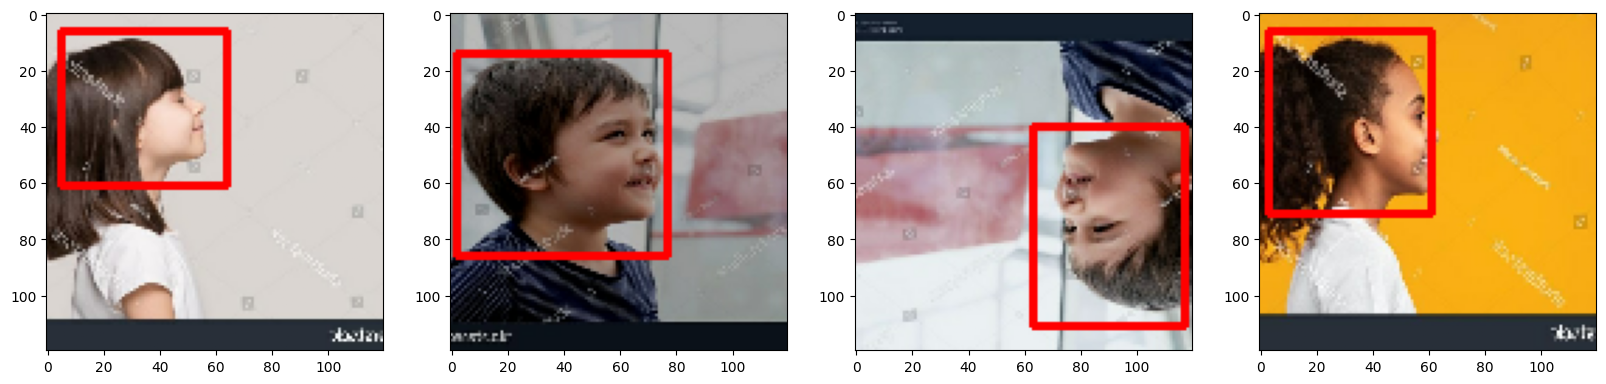

In [89]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    #
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [4]:
from tensorflow.keras.models import load_model

In [6]:
# facetracker.save('facetracker.h5')

In [7]:
facetracker = load_model('facetracker.h5')

In [ ]:
import cv2
from retinaface import RetinaFace

# Load the RetinaFace model
# retinaface = RetinaFace(quality="normal")

# Open the camera capture
cap = cv2.VideoCapture(0)  # 0 for the default camera, you can change it if needed

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Detect faces in the frame
    obj = RetinaFace.detect_faces(frame)

    for face in obj.keys():
        id=obj[face]
        facial_area=id["facial_area"]
        cv2.rectangle(frame,(facial_area[2],facial_area[3]),(facial_area[0],facial_area[1]),(255, 0, 0) ,2)

    cv2.imshow("Camera Feed", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()